In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers, utils, models, callbacks as cb
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
root = os.getcwd()
logroot = os.path.join(root,'datasets','midv-2020-scanned','experiment 2' ,'logs', 'models')
print(logroot)
datasets = (r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2\validation')

e:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2\logs\models


In [3]:
batch_size = 16
image_size = (671, 471)

def gen_data_set(val_path, reshape_data: bool = False, use_categorical: bool = False):
    val = tf.keras.preprocessing.image_dataset_from_directory(
        val_path,
        image_size=image_size,
        batch_size=1,
        labels="inferred",
        class_names=["forged", "genuine"],
        label_mode="binary",
        shuffle=False
    )
    
    xxtest = []
    yytest = []
    
    for xtest, ytest in val:
        xxtest.append(xtest[0].numpy())
        yytest.append(ytest[0][0].numpy())


    x, y = np.array(xxtest), np.array(yytest)
    
    if reshape_data:
        nsamples, nx, ny, nz = x.shape
        x = x.reshape((nsamples, nx * ny * nz))

    return x, y


tx, ty = gen_data_set((r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2\training'), reshape_data=True)

print(tx.shape)
print(ty.shape)

Found 30 files belonging to 2 classes.
(30, 948123)
(30,)


In [ ]:


# def eval_model(modelname: str, model, reshape_data: bool = False, use_categorical: bool = False,error_rate: dict[str,list[float]] = None):
#     scores = []
#     logpath = os.path.join(logroot, f'{modelname}.txt')

#     for doctype in os.listdir(datasets):
#         if doctype == "srb_passport":
#             continue

#         docpath = os.path.join(datasets, doctype)
#         valpath = os.path.join(docpath, 'validation')
#         outpath = os.path.join(docpath, f'evaluation_matrix_{modelname}.png')
        
#         if error_rate is not None and doctype not in error_rate:
#             error_rate[doctype] = []


#         vx, vy = gen_data_set(valpath, reshape_data=reshape_data)
#         vpy = model.predict(vx)
        
#         try:
#             result =  confusion_matrix(vy, vpy)
#             disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=["forged", "genuine"])
#             disp.plot(cmap=plt.cm.Blues)
#             disp.figure_.savefig(outpath)
#         except ValueError as err:
#             print(f'Encountered an error while generating confusion matrix for {modelname}.')
#             print(err)

#         if modelname.startswith("elbow"):
#             error_rate[doctype].append(np.mean(vpy != vy))
#         if hasattr(model, 'score'):
#             accuracy = model.score(vx, vy)
#             scores.append(f'{modelname} scored {accuracy:.2%} on {doctype}\n')
        
#         if hasattr(model, 'evaluate'):
#             metrics = model.evaluate(vx, vy, return_dict=True)
#             accurary = metrics['binary_accuracy']
#             scores.append(f'{modelname} scored {accuracy:.2%} on {doctype}\n')

#     with open(logpath,'w') as file:
#         for score in scores:
#             file.write(score+'\n')

    

In [4]:


def eval_model(modelname: str, model, reshape_data: bool = False, use_categorical: bool = False,error_rate: dict[str,list[float]] = None):
    scores = []
    logpath = os.path.join(logroot, f'{modelname}.txt')

    for doctype in [r'E:\University\Semester 6\Grad\forgery detection\forgery detection neural network\datasets\midv-2020-scanned\experiment 2']:
        if doctype == "srb_passport":
            continue

        docpath = os.path.join(datasets, doctype)
        valpath = os.path.join(docpath, 'validation')
        outpath = os.path.join(docpath, f'evaluation_matrix_{modelname}.png')
        
        if error_rate is not None and doctype not in error_rate:
            error_rate[doctype] = []


        vx, vy = gen_data_set(valpath, reshape_data=reshape_data)
        vpy = model.predict(vx)
        
        try:
            result =  confusion_matrix(vy, vpy)
            disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=["forged", "genuine"])
            disp.plot(cmap=plt.cm.Blues)
            disp.figure_.savefig(outpath)
        except ValueError as err:
            print(f'Encountered an error while generating confusion matrix for {modelname}.')
            print(err)

        if modelname.startswith("elbow"):
            error_rate[doctype].append(np.mean(vpy != vy))
        if hasattr(model, 'score'):
            accuracy = model.score(vx, vy)
            scores.append(f'{modelname} scored {accuracy:.2%} on {doctype}\n')
        
        if hasattr(model, 'evaluate'):
            metrics = model.evaluate(vx, vy, return_dict=True)
            accurary = metrics['binary_accuracy']
            scores.append(f'{modelname} scored {accuracy:.2%} on {doctype}\n')

    with open(logpath,'w') as file:
        for score in scores:
            file.write(score+'\n')

    

In [ ]:
print(ty)

Found 180 files belonging to 2 classes.


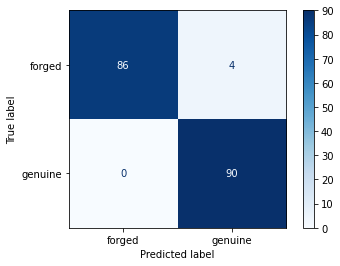

In [5]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(tx, ty)

eval_model('svm', svm, reshape_data=True)
None

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nn = None
for k in reversed([1, 3, 5, 10, 15]):
    nn = KNeighborsClassifier(n_neighbors=k)
    nn.fit(tx, ty)
    eval_model(f'{k}nn', nn, reshape_data=True)

Found 180 files belonging to 2 classes.


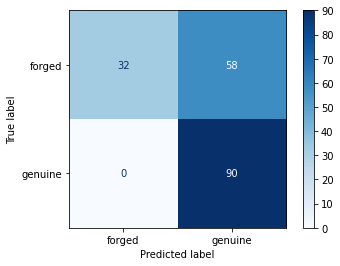

In [8]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(tx, ty)

eval_model('decision_tree', dt, reshape_data=True)

Found 180 files belonging to 2 classes.


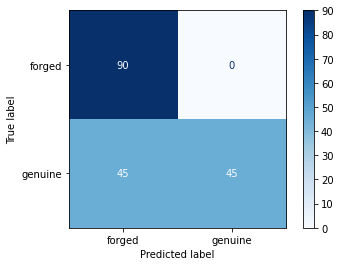

In [9]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(tx, ty)

eval_model('naive_bayes', nb, reshape_data=True)

Found 180 files belonging to 2 classes.


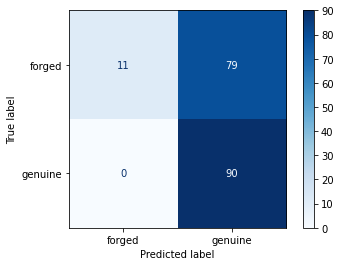

In [10]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab = ab.fit(tx, ty)

eval_model('ada_boost', ab, reshape_data=True)

Found 180 files belonging to 2 classes.


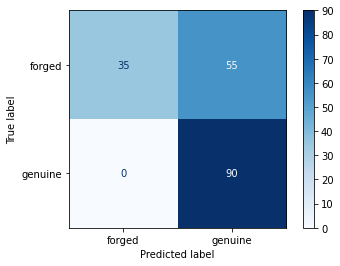

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(tx, ty)

eval_model('random_forest_classifier', rf, reshape_data=True)

Found 180 files belonging to 2 classes.


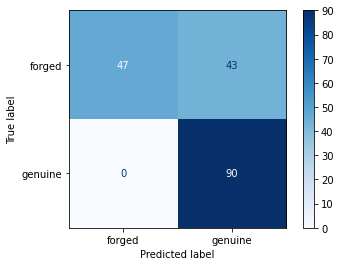

In [12]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('naive_bayes', nb),
        #('knn', nn),
        ('ada_boost', ab),
        ('decision_tree', dt),
        ('random_forest_classifier', rf)
    ]
)

vc = vc.fit(tx, ty)
eval_model('voting_classifier', vc, reshape_data=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = {}
nn  = None
for i in range(1,16):
    nn = KNeighborsClassifier(n_neighbors=i)
    nn.fit(tx, ty)
    eval_model(f'elbow_knn{i}', nn,  reshape_data=True,error_rate=error_rate)
print (error_rate)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# nn = None
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(tx, ty)
eval_model(f'{1}knn_elbow', nn, reshape_data=True)

In [ ]:
for doctype,rate in error_rate.items():
    if len(rate) ==0:
        continue

    plt.figure(figsize=(10,6))
    
    plt.plot(range(1,16),rate,color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
    plt.title(doctype)
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.xticks(range(1,16))
    plt.yticks([x/100 for x in range(0,50,2)])